## Bibliotecas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [15]:
vgsales = pd.read_csv("vgsales.csv")
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 1 - Como é o histórico de vendas na América do Norte?

Para responder essa questão precisamos olhar a data juntamente com as vendas na américa do norte.

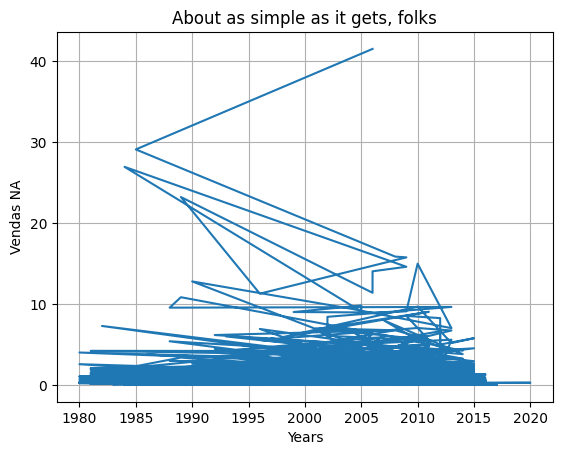

In [16]:
# Está errado, havia esquecido de agrupar os anos
fig, ax = plt.subplots()
ax.plot(vgsales["Year"], vgsales["NA_Sales"])

ax.set(xlabel="Years", ylabel="Vendas NA", title="About as simple as it gets, folks")
ax.grid()
plt.show()

In [17]:
# Agrupando por anoe somando as vendas

agrupando = vgsales[["Year", 
                     "NA_Sales", 
                     "EU_Sales", 
                     "JP_Sales", 
                     "Other_Sales", 
                     "Global_Sales"]].groupby("Year").agg(lambda x: sum(x)).reset_index()

agrupando.tail(5)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
34,2014.0,131.97,125.65,39.46,40.02,337.05
35,2015.0,102.82,97.71,33.72,30.01,264.44
36,2016.0,22.66,26.76,13.70,7.75,70.93
37,2017.0,0.00,0.00,0.05,0.00,0.05
38,2020.0,0.27,0.00,0.00,0.02,0.29


In [18]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


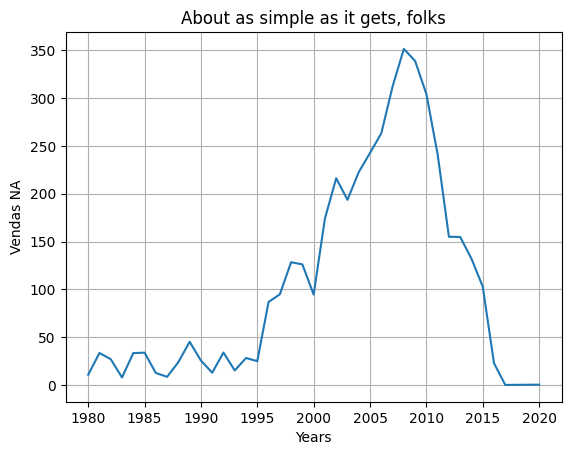

In [19]:
fig, ax = plt.subplots()
ax.plot(agrupando["Year"], agrupando["NA_Sales"])

ax.set(xlabel="Years", ylabel="Vendas NA", title="About as simple as it gets, folks")
ax.grid()
plt.show()

### 2 - E nos outros continentes?

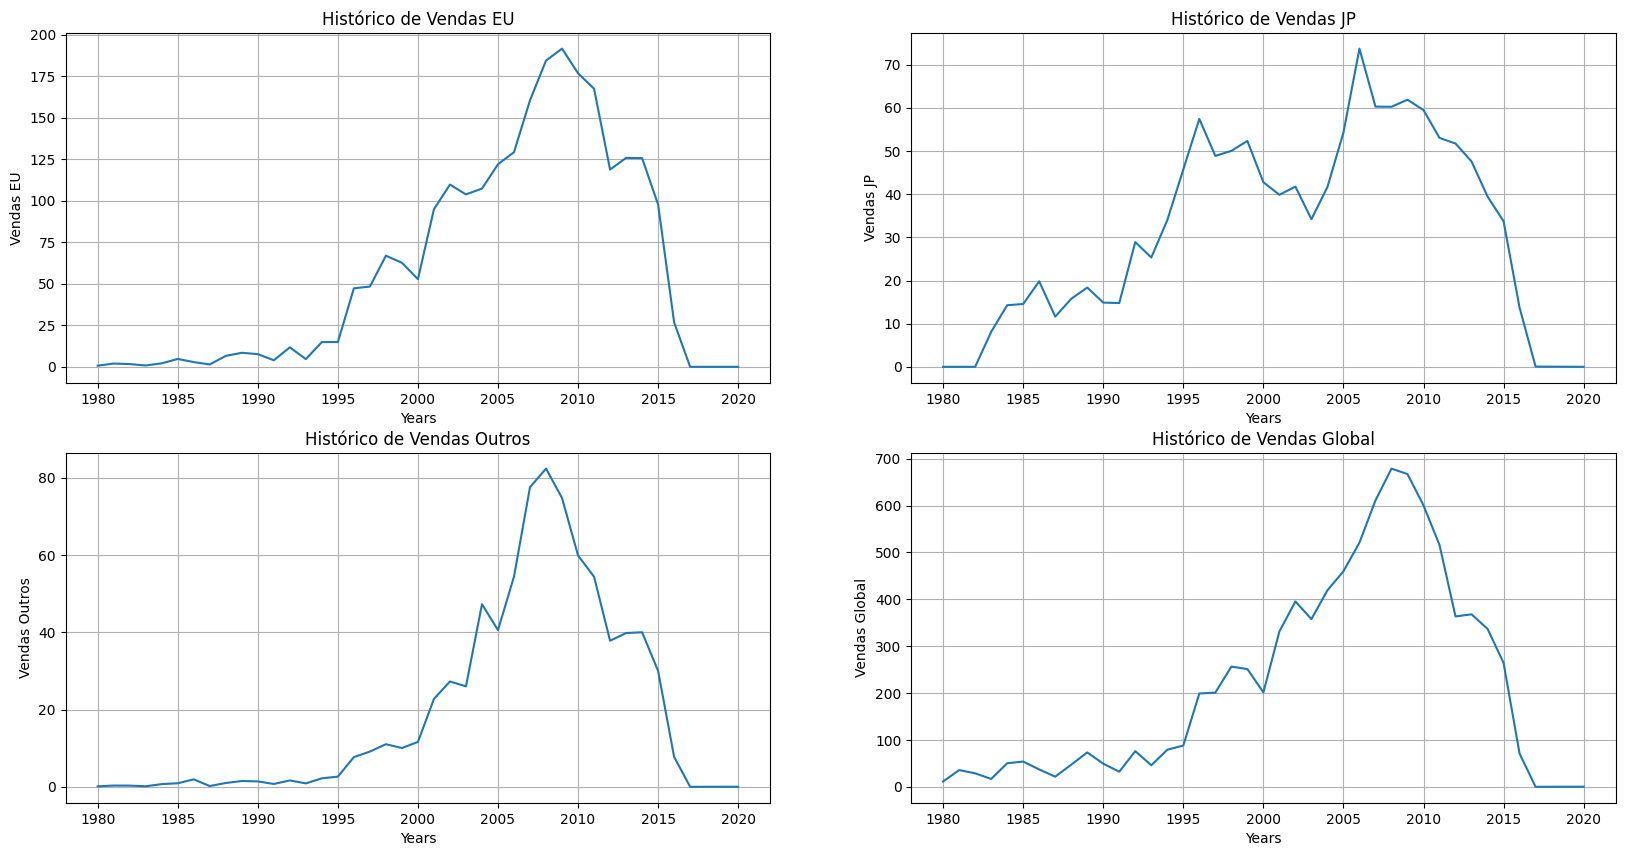

In [20]:
# Plotando todos outros juntos
fig, axs = plt.subplots(2, 2, figsize = (20,10))
axs[0,0].plot(agrupando["Year"], agrupando["EU_Sales"])
axs[0,1].plot(agrupando["Year"], agrupando["JP_Sales"])
axs[1,1].plot(agrupando["Year"], agrupando["Global_Sales"])
axs[1,0].plot(agrupando["Year"], agrupando["Other_Sales"])

axs[0,0].set(xlabel="Years", ylabel="Vendas EU", title="Histórico de Vendas EU")
axs[0,1].set(xlabel="Years", ylabel="Vendas JP", title="Histórico de Vendas JP")
axs[1,1].set(xlabel="Years", ylabel="Vendas Global", title="Histórico de Vendas Global")
axs[1,0].set(xlabel="Years", ylabel="Vendas Outros", title="Histórico de Vendas Outros")

axs[0,0].grid()
axs[0,1].grid()
axs[1,1].grid()
axs[1,0].grid()

plt.show()

#### **Observando todas as regiões juntas**

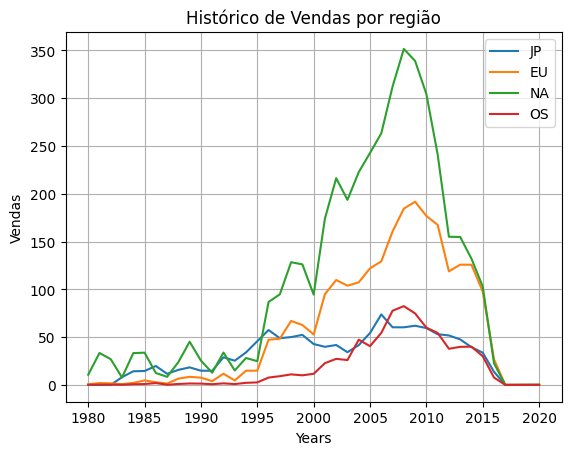

In [21]:
fig, ax = plt.subplots()
ax.plot(agrupando["Year"], agrupando["JP_Sales"], label="JP")
ax.plot(agrupando["Year"], agrupando["EU_Sales"], label="EU")
ax.plot(agrupando["Year"], agrupando["NA_Sales"], label="NA")
ax.plot(agrupando["Year"], agrupando["Other_Sales"], label="OS")
ax.set(xlabel="Years", ylabel="Vendas", title="Histórico de Vendas por região")
ax.grid()
ax.legend()
plt.show()

### 3 - Existem vários tipos de jogos nesses dados, eles são todos iguais em relação às vendas da América do Norte? E nos outros?

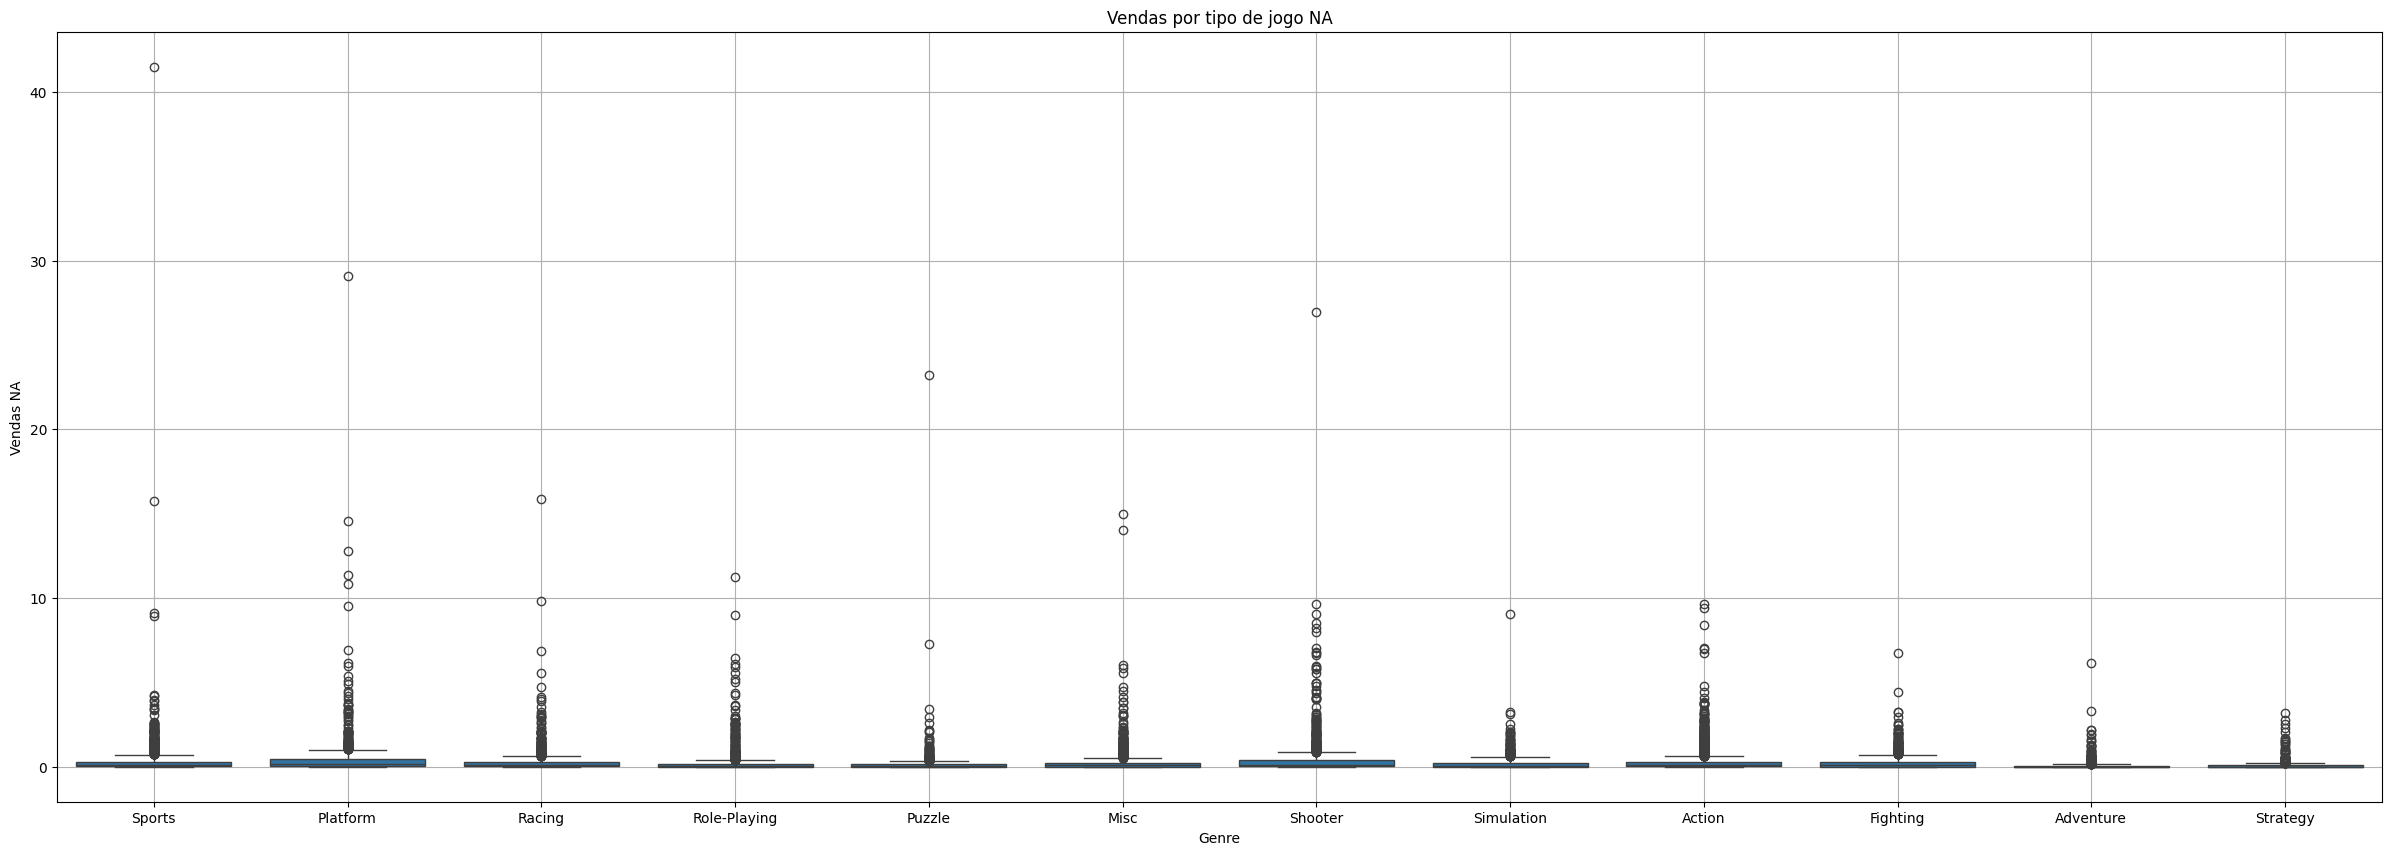

In [22]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=vgsales, x=vgsales["Genre"], y=vgsales["NA_Sales"])

ax.set(ylabel="Vendas NA", title = "Vendas por tipo de jogo NA")
ax.grid()
plt.show()

In [30]:
vgsales["NA_Sales"][vgsales["Genre"] == "Strategy"].describe()

count    681.000000
mean       0.100881
std        0.298956
min        0.000000
25%        0.000000
50%        0.000000
75%        0.080000
max        3.180000
Name: NA_Sales, dtype: float64

Vemos que o comportamento está parecido, mas com muitos outliers os gráficos ficam bem achatados.
Portanto podemos verificar também o total em cada tipo.

In [23]:
# Agrupando pelo tipo de jogo
ag_genre = vgsales[["Genre", 
                    "NA_Sales", 
                    "EU_Sales", 
                    "JP_Sales", 
                    "Other_Sales", 
                    "Global_Sales"]].groupby("Genre").agg(lambda x: sum(x)).reset_index()
ag_genre.tail(5)


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
8,Shooter,582.60,313.27,38.28,102.69,1037.37
9,Simulation,183.31,113.38,63.70,31.52,392.20
10,Sports,683.35,376.85,135.37,134.97,1330.93
11,Strategy,68.70,45.34,49.46,11.36,175.12


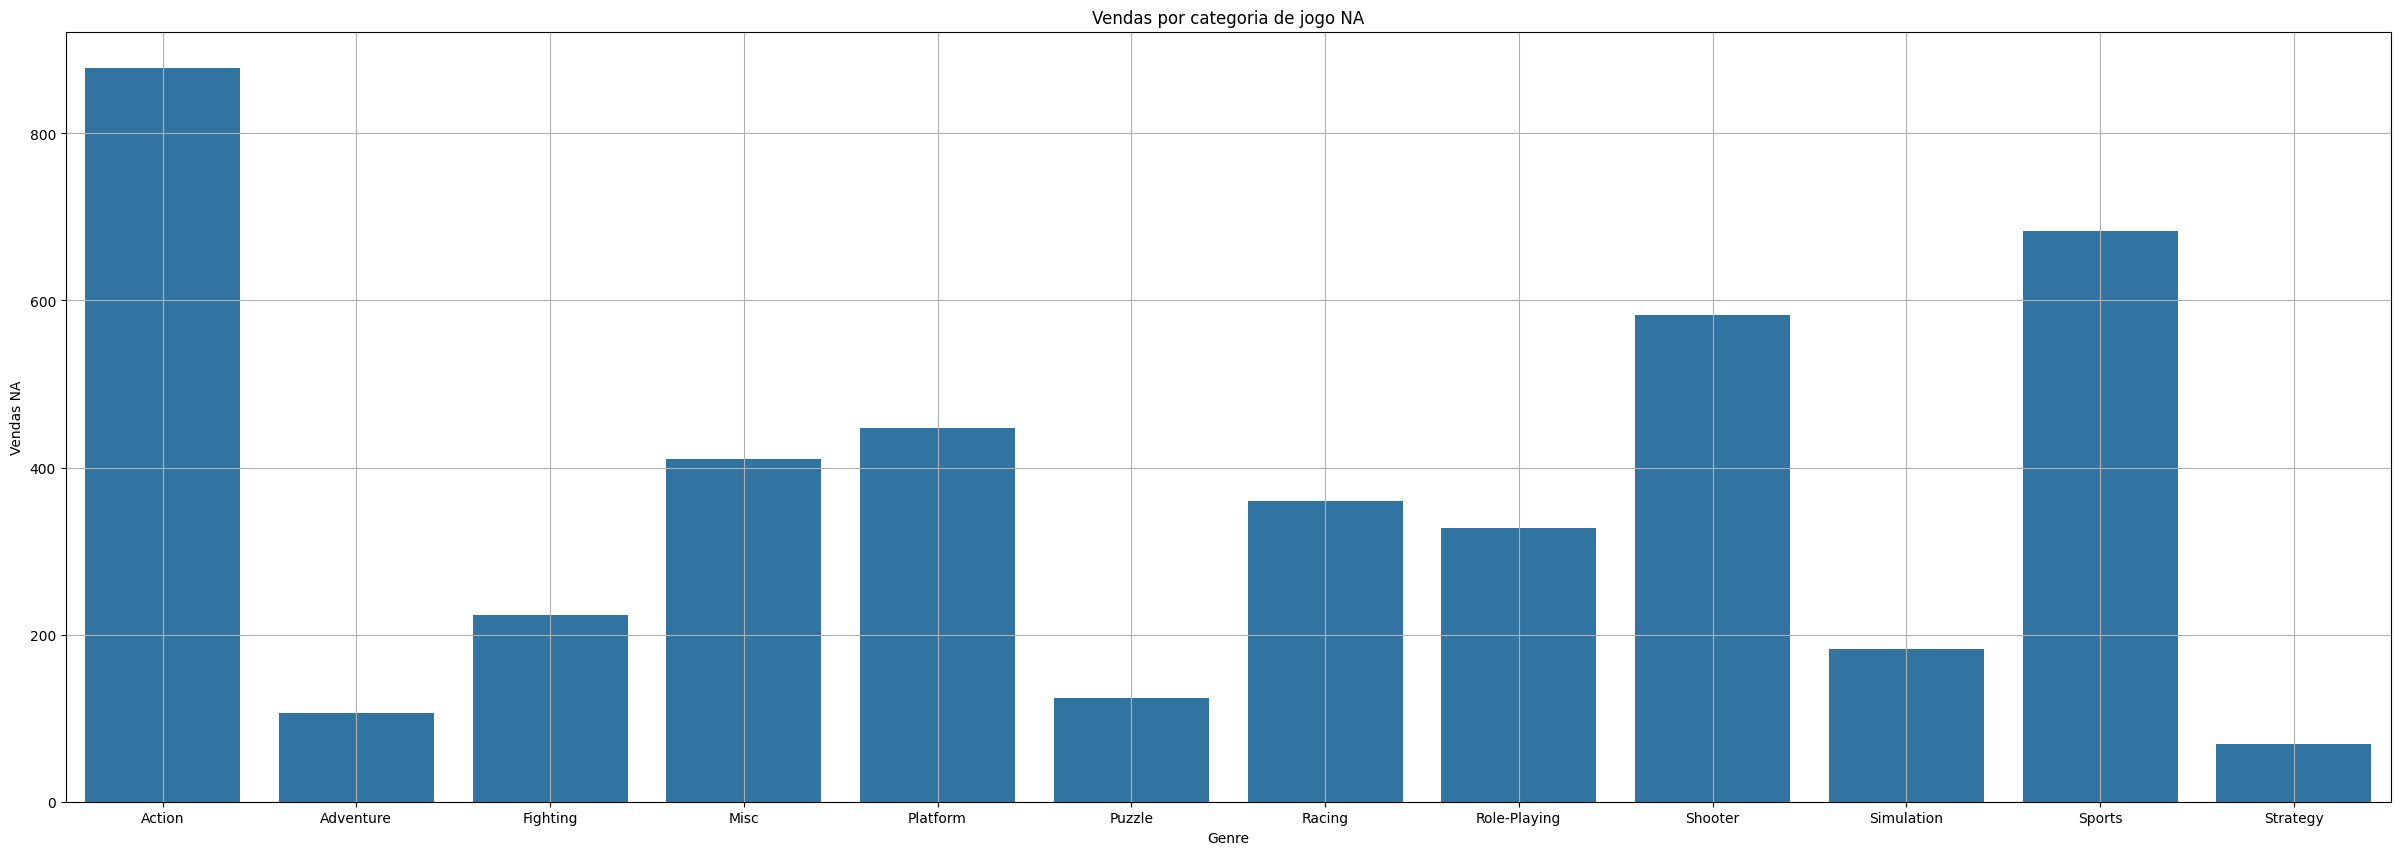

In [24]:
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(data=ag_genre, x=ag_genre["Genre"], y=ag_genre["NA_Sales"])

ax.set(ylabel="Vendas NA", title="Vendas por categoria de jogo NA")
ax.grid()
plt.show()

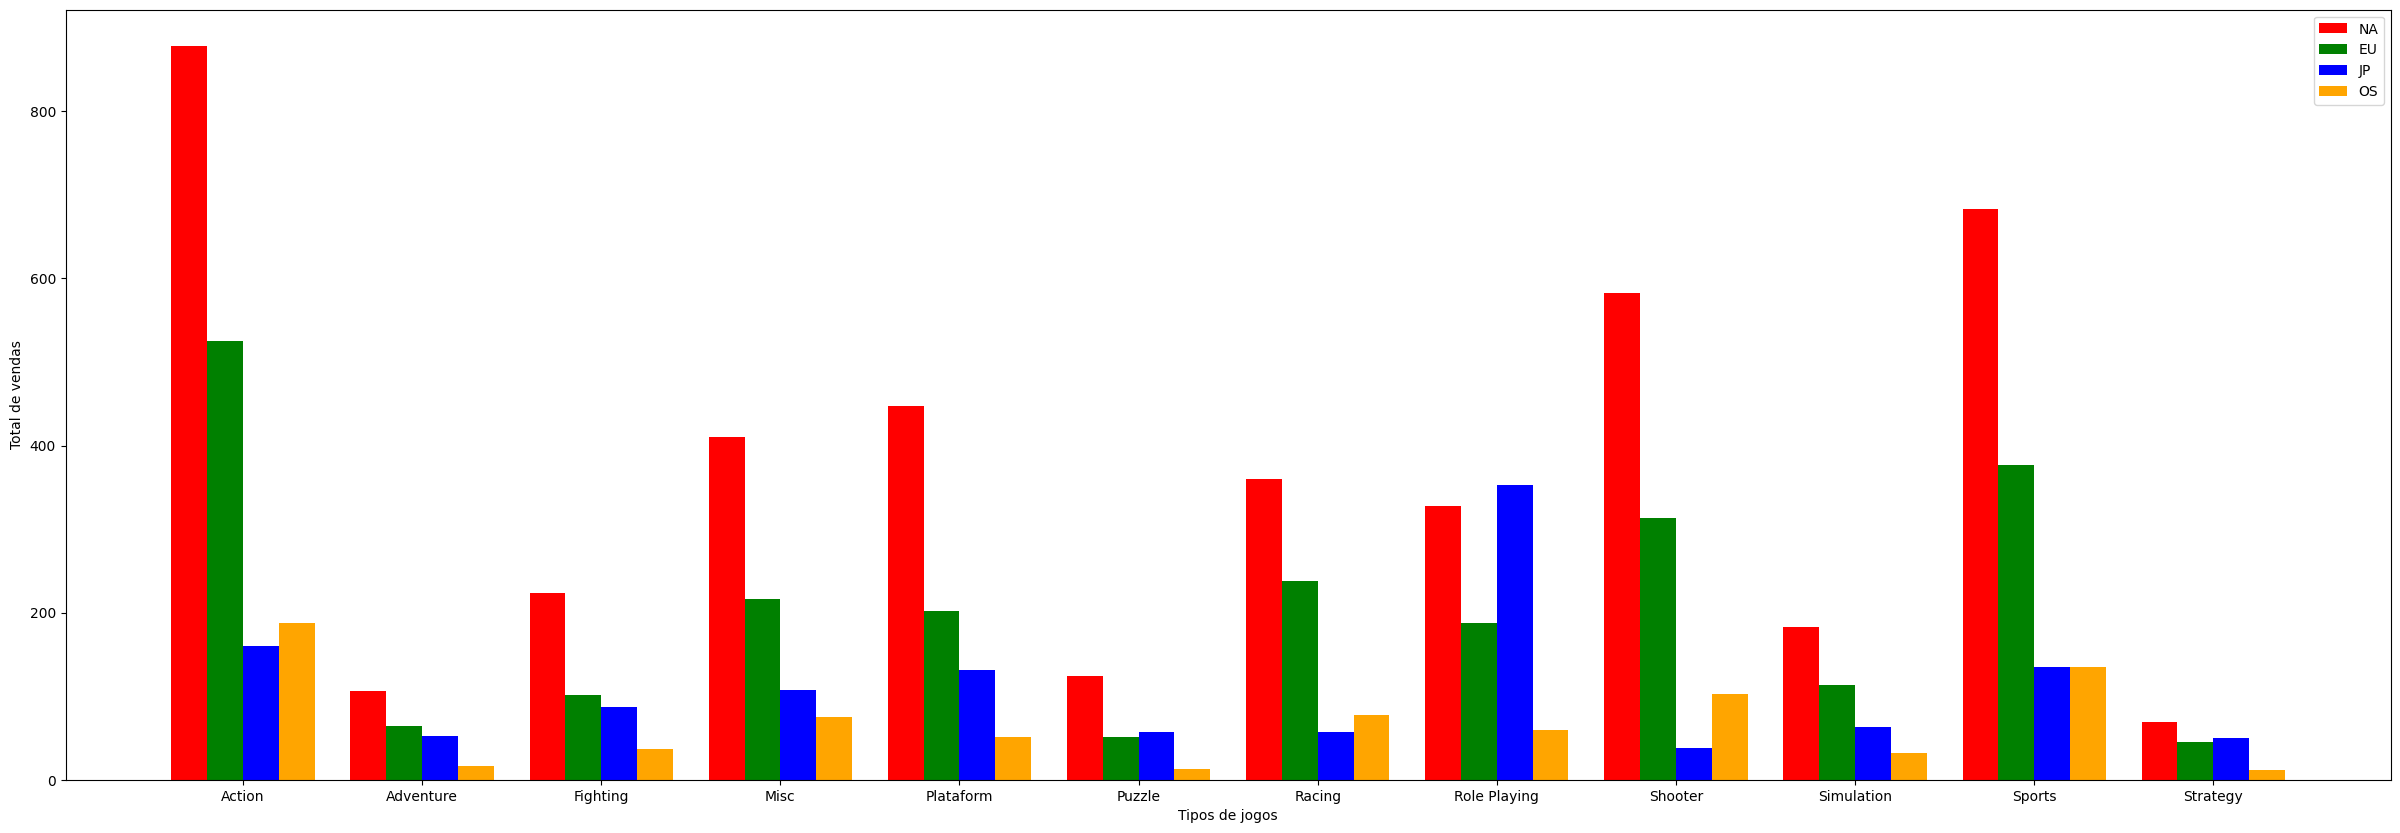

In [25]:
fig, axs = plt.subplots(figsize=(30,10))
NA_s = ag_genre["NA_Sales"]
EU_s = ag_genre["EU_Sales"]
JP_s = ag_genre["JP_Sales"]
OS_s = ag_genre["Other_Sales"]

tst = np.arange(len(ag_genre["Genre"]))
width = 0.20

NA = plt.bar(tst, height=NA_s, width=width, color="red")
EU = plt.bar(tst+width, height=EU_s, width=width, color="green")
JP = plt.bar(tst+width*2, height=JP_s, width=width, color="blue")
OS = plt.bar(tst+width*3, height=OS_s, width=width, color="orange")

plt.xlabel("Tipos de jogos")
plt.ylabel("Total de vendas")

plt.xticks(tst+3/2*width, ["Action", 
                               "Adventure", 
                               "Fighting", 
                               "Misc", 
                               "Plataform", 
                               "Puzzle", 
                               "Racing", 
                               "Role Playing",
                               "Shooter",
                               "Simulation",
                               "Sports",
                               "Strategy"])
plt.legend((NA, EU, JP, OS), ("NA", "EU", "JP", "OS"))
plt.show()

### 4 - Existem jogos que giram mais dinheiro que outros? Quais são?

Podemos pensar em ordenar a base pelo total global de vendas

In [33]:
num = vgsales[['Name', 
               'NA_Sales', 
               'EU_Sales', 
               'JP_Sales', 
               'Other_Sales', 
               'Global_Sales']].groupby('Name').agg(lambda x: sum(x)).reset_index()

num.sort_values('Global_Sales', ascending=False).head(10)

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11007,Wii Sports,41.49,29.02,3.77,8.46,82.74
3712,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
9327,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
9715,Tetris,26.17,2.95,6.03,0.69,35.84
5573,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
11009,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
7346,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
1222,Call of Duty: Black Ops,17.59,9.50,0.59,3.36,31.03
1228,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
6723,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01


In [34]:
# Fazendo dessa forma estaria errado, pois existem jogos que são multiplataforma, 
# então precisamos agrupar os jogos que são iguais antes.

vgsales.sort_values('Global_Sales', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16187,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16188,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16189,16192,Sonic & All-Stars Racing Transformed,PC,2013.0,Racing,Sega,0.00,0.01,0.00,0.00,0.01


<Axes: xlabel='Name', ylabel='Global_Sales'>

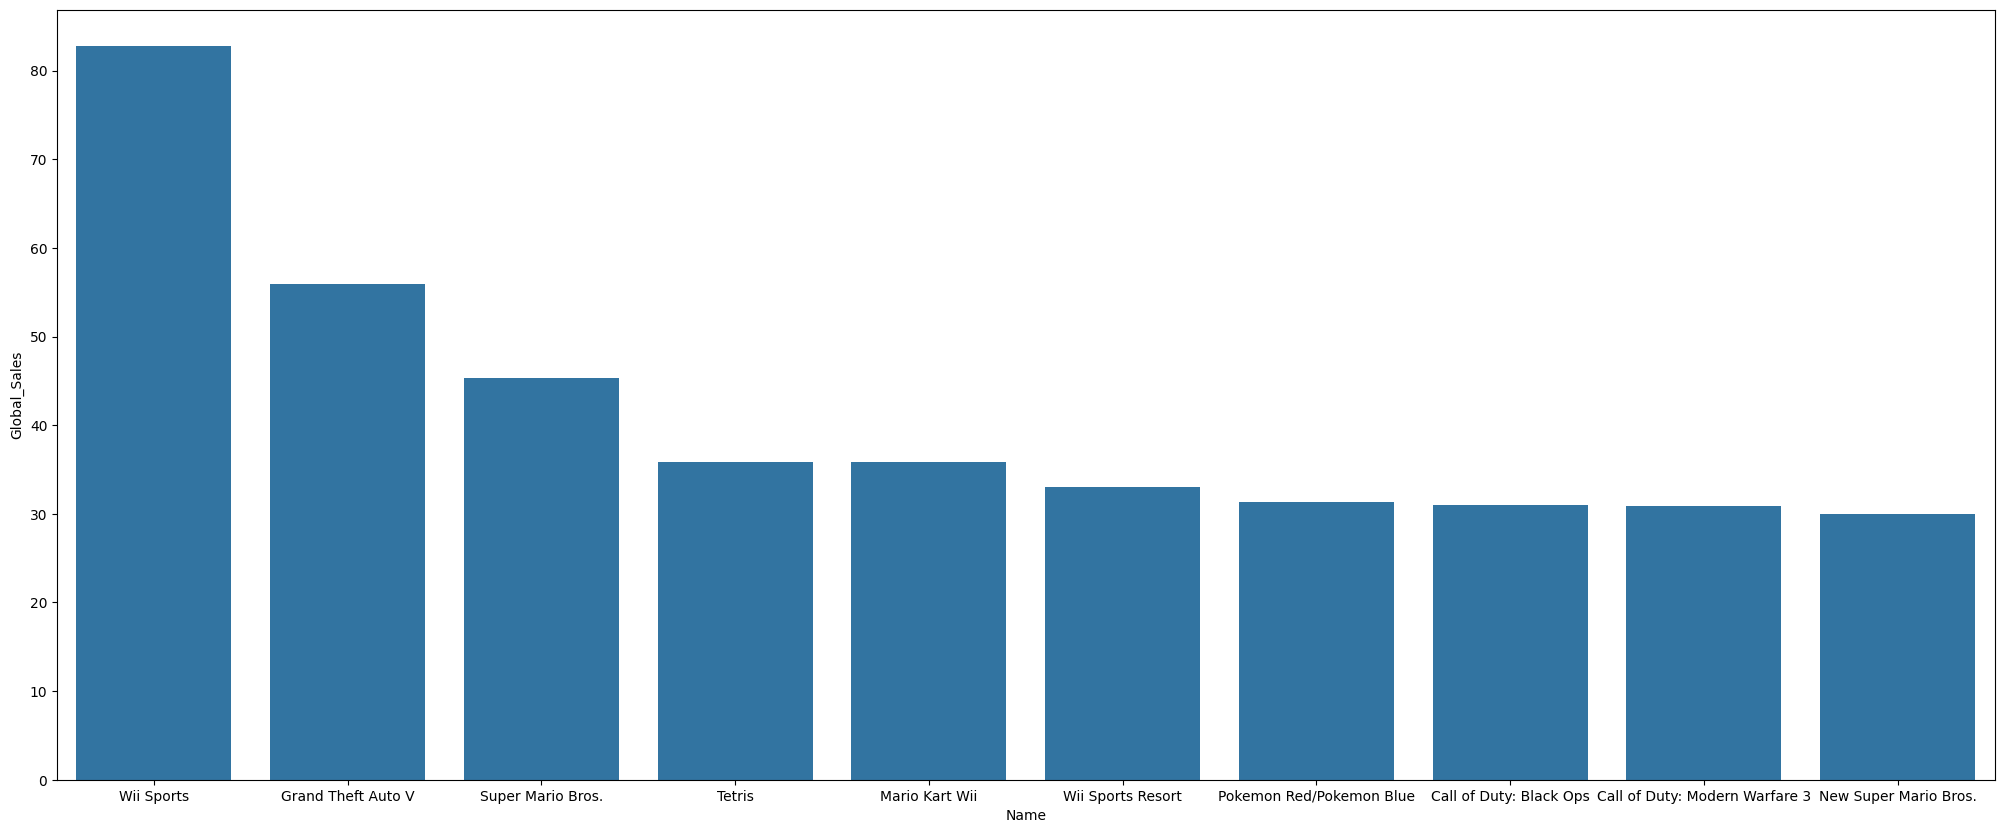

In [36]:
# Pegando o top 10

top10 = num.sort_values('Global_Sales', ascending=False).head(10)
fig, axs = plt.subplots(figsize = (25,10))
sns.barplot(data = top10, x = top10['Name'], y = top10['Global_Sales'])

### 5 - Nessa base vemos que demais continentes estão agrupados ('resto do mundo')... é um valor muito diferente dos outros países na tabela ou isso quer dizer que outros continentes ainda estão gastando pouco com isso ?

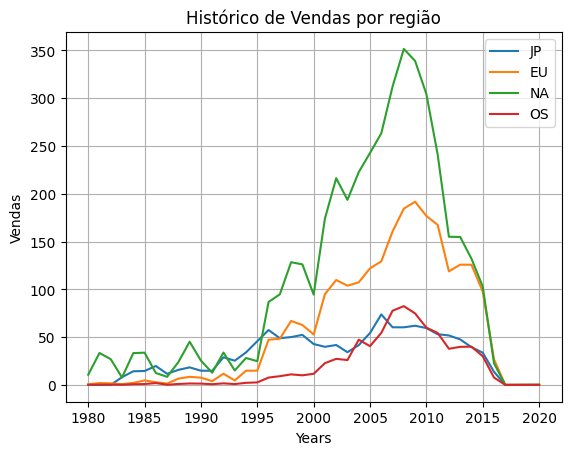

In [37]:
fig, ax = plt.subplots()
ax.plot(agrupando['Year'], agrupando['JP_Sales'], label='JP')
ax.plot(agrupando['Year'], agrupando['EU_Sales'], label='EU')
ax.plot(agrupando['Year'], agrupando['NA_Sales'], label='NA')
ax.plot(agrupando['Year'], agrupando['Other_Sales'], label='OS')
ax.set(xlabel='Years', ylabel='Vendas', title='Histórico de Vendas por região')
ax.grid()
ax.legend()
plt.show()

### 6 - Nesses outros continentes, nós vemos algum padrão?Tipo uma tendência de crescimento? (O que seria ótimo pra gente...) 

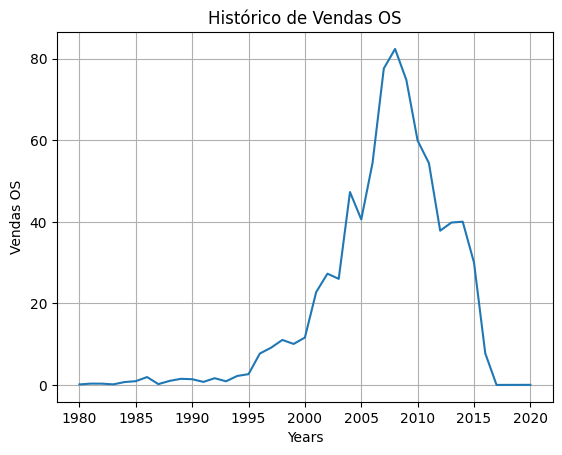

In [38]:
fig, ax = plt.subplots()
ax.plot(agrupando['Year'], agrupando['Other_Sales'])

ax.set(xlabel='Years', ylabel='Vendas OS', title = 'Histórico de Vendas OS')
ax.grid()
plt.show()

O comportamento é parecido com os outros países do mundo

### 7 - Quais são os jogos mais vendidos?

In [39]:
num = vgsales[['Name', 
               'NA_Sales', 
               'EU_Sales',
               'JP_Sales',
               'Other_Sales', 
               'Global_Sales']].groupby('Name').agg(lambda x: sum(x)).reset_index()
num.sort_values('Global_Sales', ascending=False).head(10)

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11007,Wii Sports,41.49,29.02,3.77,8.46,82.74
3712,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
9327,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
9715,Tetris,26.17,2.95,6.03,0.69,35.84
5573,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
11009,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
7346,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
1222,Call of Duty: Black Ops,17.59,9.50,0.59,3.36,31.03
1228,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
6723,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01


### 8 - O mais vendido está crescendo ou em queda?

Precisaria do histórico para essa questão

In [40]:
top1 = vgsales.sort_values('Global_Sales', ascending=False).head(1)
top1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


### 9 - Algum jogo está com vendas em queda?

Precisaria do histórico para essa questão

### 10 - Qual ano foi o campeão de vendas?

In [41]:
ag_ano = vgsales[['Year', 'Global_Sales']].groupby('Year').agg(lambda x: sum(x)).reset_index()
ag_ano.sort_values('Global_Sales', ascending=False)

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


<Axes: xlabel='Year', ylabel='Global_Sales'>

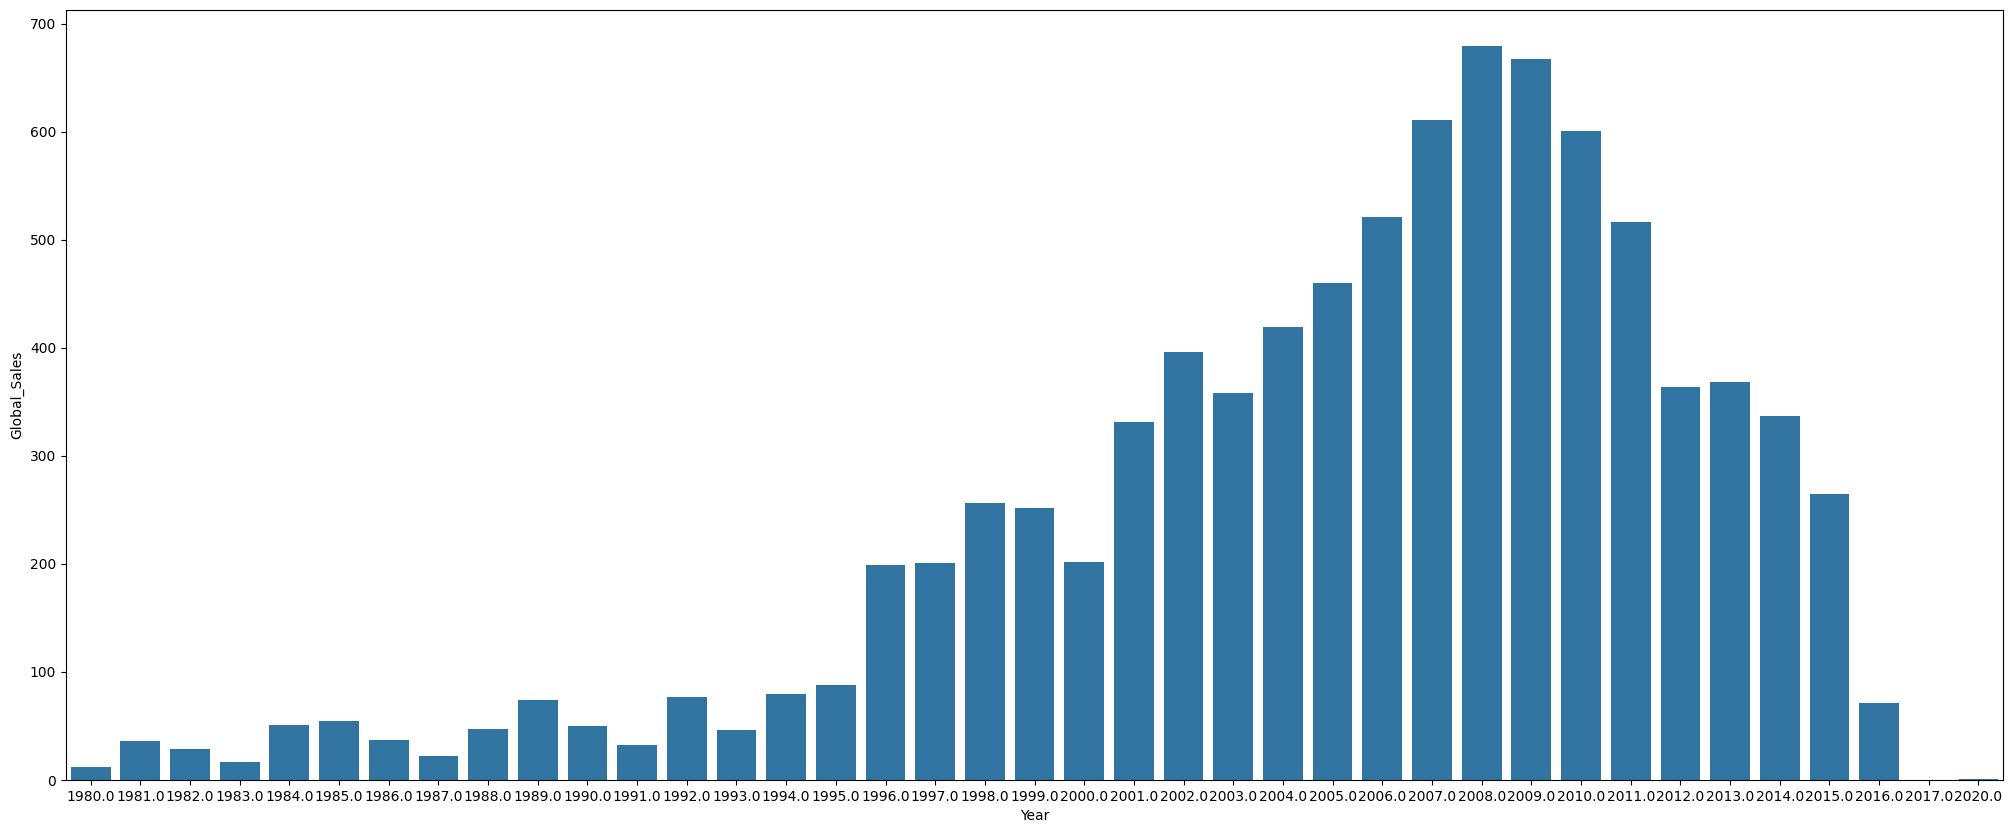

In [42]:
# Plotando as vendas por ano
fig, axs = plt.subplots(figsize = (25,10))
sns.barplot(data = ag_ano, x = ag_ano['Year'], y = ag_ano['Global_Sales'])

### 11 - Qual editora teve mais vendas no último ano? Qual foi o movimento da existência dela? Crescimento ou queda? (lançar algo com o movimento em queda é difícil demais né?)

In [44]:
# Agrupando pela editora do jogo
publi = vgsales[(vgsales['Year'] == 2020.0)]
ag_publi = publi[['Publisher', 
                  'NA_Sales', 
                  'EU_Sales', 
                  'JP_Sales', 
                  'Other_Sales', 
                  'Global_Sales']].groupby('Publisher').agg(lambda x: sum(x)).reset_index()
ag_publi.head(5)

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Ubisoft,0.27,0.0,0.0,0.02,0.29


Só um jogo foi lançado em 2020

**Vamos ver no ano de 2008 por ser o melhor ano em vendas**

In [47]:
# Agrupando pela editora do jogo
publi = vgsales[(vgsales['Year'] == 2008.0)]
ag_publi = publi[['Publisher', 
                  'NA_Sales', 
                  'EU_Sales', 
                  'JP_Sales', 
                  'Other_Sales', 
                  'Global_Sales']].groupby('Publisher').agg(lambda x: sum(x)).reset_index()
ag_publi.sort_values('Global_Sales', ascending=False).head(10)

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
108,Nintendo,38.83,25.13,19.96,7.22,91.22
52,Electronic Arts,45.10,25.59,0.78,12.65,84.12
6,Activision,40.83,16.19,0.05,10.32,67.41
151,Ubisoft,31.88,18.96,0.68,5.90,57.44
142,Take-Two Interactive,26.46,13.78,0.71,5.28,46.18
131,Sega,16.49,12.90,3.44,4.39,37.19
140,THQ,18.44,7.83,0.06,4.07,30.45
83,Konami Digital Entertainment,9.48,7.75,5.91,4.63,27.82
132,Sony Computer Entertainment,11.02,8.50,1.24,5.87,26.64
48,Disney Interactive Studios,12.32,6.92,0.02,2.78,22.09


**Vamos ver o movimento da Nintendo ao londo dos anos**

In [49]:
Nintendo = vgsales[(vgsales['Publisher'] == 'Nintendo')]

ag_nint = Nintendo[['Year',
                    'NA_Sales', 
                    'EU_Sales', 
                    'JP_Sales',
                    'Other_Sales', 
                    'Global_Sales']].groupby('Year').agg(lambda x: sum(x)).reset_index()

ag_nint.head(50)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1983.0,2.32,0.46,8.10,0.08,10.96
1,1984.0,32.57,1.95,10.36,0.67,45.56
2,1985.0,32.48,4.54,12.02,0.91,49.95
3,1986.0,6.73,1.73,7.45,0.26,16.18
4,1987.0,5.13,1.18,5.46,0.18,11.95
5,1988.0,21.23,6.15,8.13,0.93,36.44
6,1989.0,39.81,7.60,15.06,1.40,63.88
7,1990.0,19.75,6.42,8.08,1.22,35.49
8,1991.0,6.95,2.47,6.22,0.33,15.97
9,1992.0,18.48,6.08,12.66,0.91,38.11


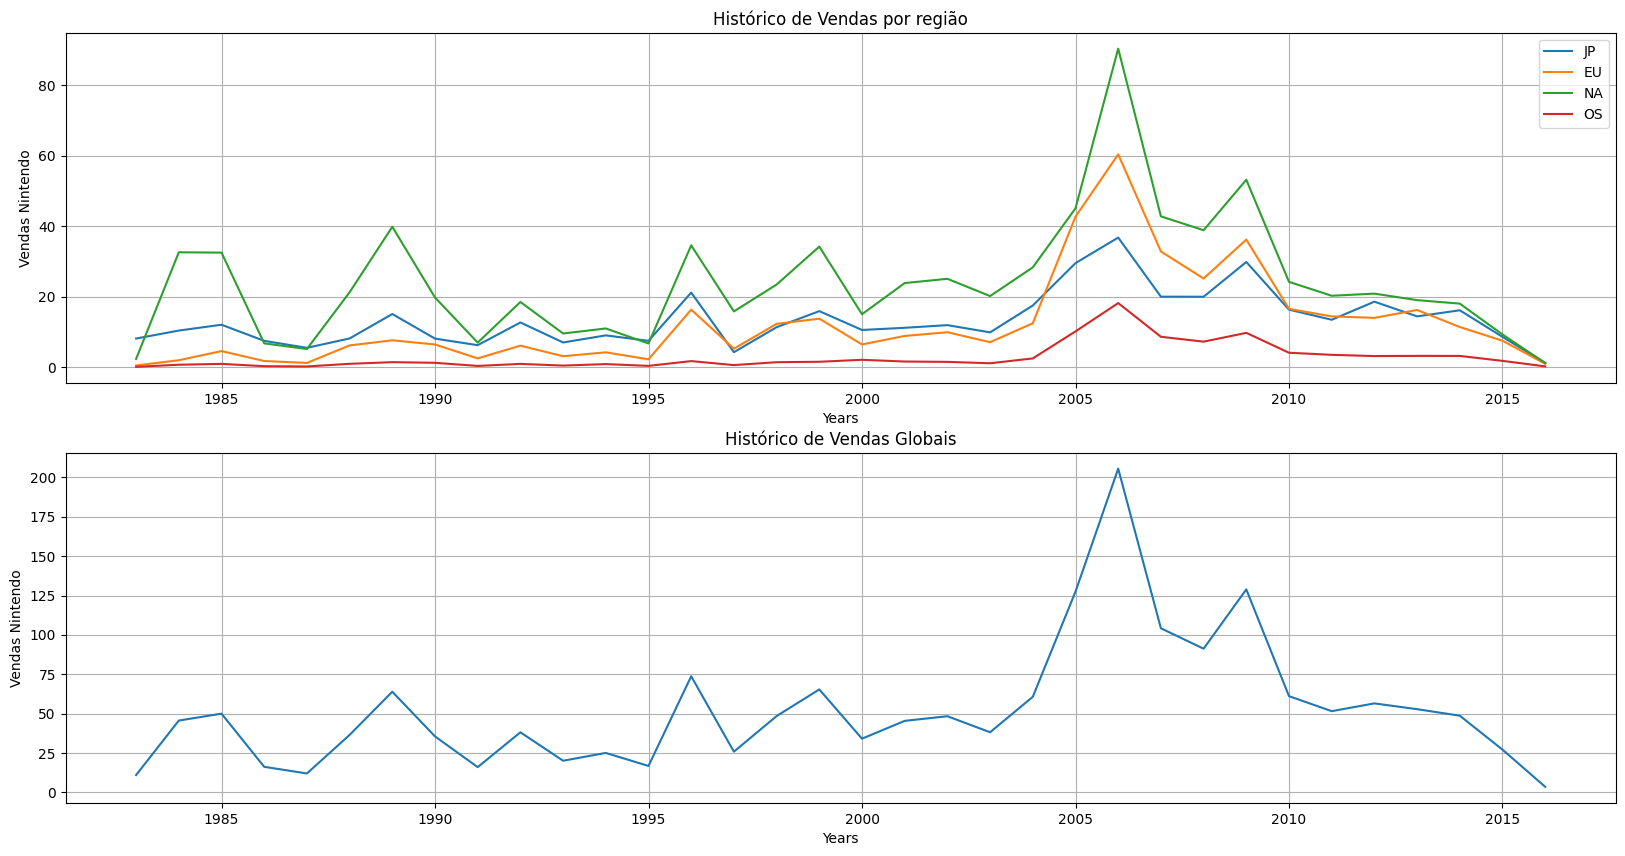

In [51]:
fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].plot(ag_nint['Year'], ag_nint['JP_Sales'], label='JP')
axs[0].plot(ag_nint['Year'], ag_nint['EU_Sales'], label='EU')
axs[0].plot(ag_nint['Year'], ag_nint['NA_Sales'], label='NA')
axs[0].plot(ag_nint['Year'], ag_nint['Other_Sales'], label='OS')
axs[1].plot(ag_nint['Year'], ag_nint['Global_Sales'], label='OS')
axs[0].set(xlabel='Years', ylabel='Vendas Nintendo', title='Histórico de Vendas por região')
axs[1].set(xlabel='Years', ylabel='Vendas Nintendo', title='Histórico de Vendas Globais')

axs[0].grid()
axs[1].grid()
axs[0].legend()
plt.show()

**Qual ano a Nintendo vendeu mais e quais jogos foram vendidos nesse ano?**

In [52]:
ag_nint.sort_values('Global_Sales', ascending=False).head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,2006.0,90.35,60.35,36.74,18.16,205.61
26,2009.0,53.15,36.18,29.82,9.71,128.89
22,2005.0,45.05,42.69,29.50,10.13,127.47
24,2007.0,42.77,32.81,19.98,8.60,104.18
25,2008.0,38.83,25.13,19.96,7.22,91.22


**Os jogos mais vendidos em 2006 pela Nintendo foram:**

In [54]:
vgsales[(vgsales['Publisher'] == 'Nintendo') & (vgsales['Year'] == 2006.0)].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31


### 12 - Qual plataforma teve mais vendas? Qual foi o movimento desde a existência dela?

In [55]:
# Agrupando pela plataforma do jogo
plat = vgsales[['Platform',
                'NA_Sales', 
                'EU_Sales', 
                'JP_Sales',
                'Other_Sales', 
                'Global_Sales']].groupby('Platform').agg(lambda x: sum(x)).reset_index()

plat.sort_values('Global_Sales', ascending=False).head(10)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS2,583.84,339.29,139.20,193.44,1255.64
28,X360,601.05,280.58,12.43,85.54,979.96
17,PS3,392.26,343.71,79.99,141.93,957.84
26,Wii,507.71,268.38,69.35,80.61,926.71
4,DS,390.71,194.65,175.57,60.53,822.49
15,PS,336.51,213.60,139.82,40.91,730.66
6,GBA,187.54,75.25,47.33,7.73,318.50
19,PSP,108.99,68.25,76.79,42.19,296.28
18,PS4,96.80,123.70,14.30,43.36,278.10
13,PC,93.28,139.68,0.17,24.86,258.82


Playstation 2 foi a plataforma com maior número de vendas de jogos

In [58]:
# Agora observando o comportamento do PS2
# Agrupando pela plataforma do jogo

pre = vgsales[(vgsales['Platform'] == 'PS2')]
ps2 = pre[['Year', 
           'NA_Sales', 
           'EU_Sales', 
           'JP_Sales', 
           'Other_Sales', 
           'Global_Sales']].groupby('Year').agg(lambda x: sum(x)).reset_index()

ps2.head(50)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2000.0,16.08,10.64,8.87,3.58,39.11
1,2001.0,79.49,52.37,17.79,16.78,166.43
2,2002.0,96.54,65.27,21.85,21.72,205.40
3,2003.0,83.54,61.20,18.88,20.69,184.29
4,2004.0,96.78,56.01,19.17,39.85,211.78
5,2005.0,85.60,40.86,15.05,19.15,160.65
6,2006.0,49.93,21.61,17.64,14.24,103.42
7,2007.0,32.05,10.43,9.82,23.69,76.00
8,2008.0,21.23,7.63,5.73,19.31,53.83
9,2009.0,9.36,4.94,1.94,10.16,26.45


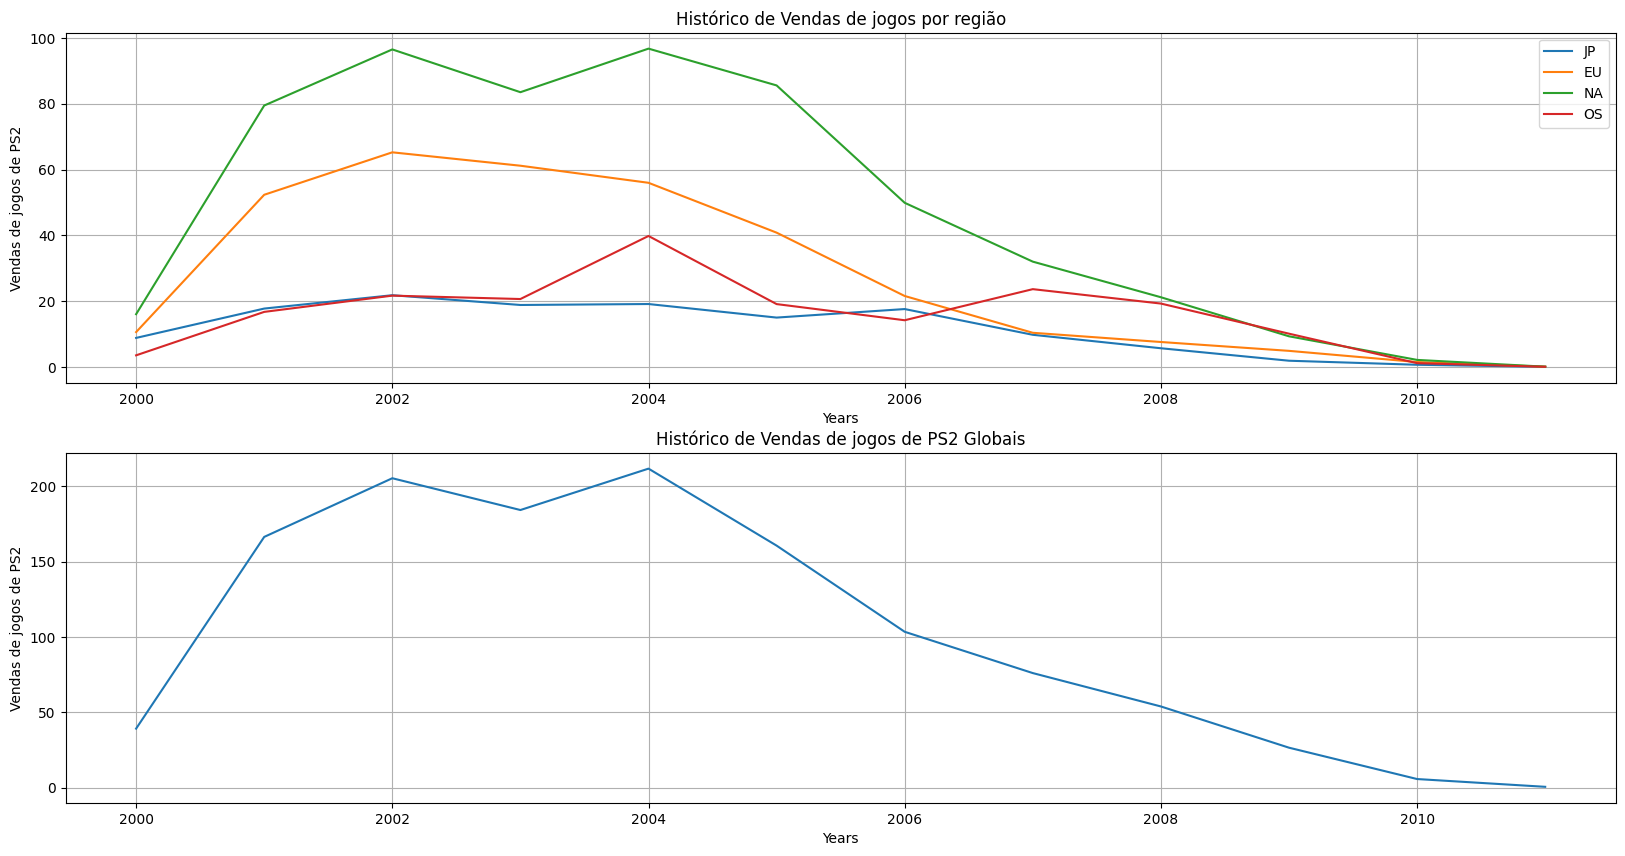

In [60]:
fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].plot(ps2['Year'], ps2['JP_Sales'], label='JP')
axs[0].plot(ps2['Year'], ps2['EU_Sales'], label='EU')
axs[0].plot(ps2['Year'], ps2['NA_Sales'], label='NA')
axs[0].plot(ps2['Year'], ps2['Other_Sales'], label='OS')
axs[1].plot(ps2['Year'], ps2['Global_Sales'], label='OS')
axs[0].set(xlabel='Years', ylabel='Vendas de jogos de PS2', title='Histórico de Vendas de jogos por região')
axs[1].set(xlabel='Years', ylabel='Vendas de jogos de PS2', title='Histórico de Vendas de jogos de PS2 Globais')

axs[0].grid()
axs[1].grid()
axs[0].legend()
plt.show()

### 13 - Quantos jogos são lançados por ano?

In [61]:
# Contando jogos por ano
jogos_ano = vgsales[['Year', 'Name']].groupby('Year').agg(lambda x: x.count()).reset_index()
jogos_ano

,Year,Name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


### 14 - Como é esse movimento ao longo dos anos? Estão aumentando os números de jogos lançados ao longo dos anos?

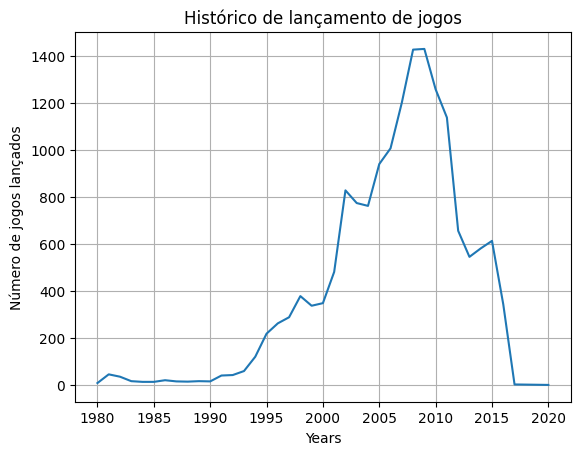

In [62]:
fig, ax = plt.subplots()
ax.plot(jogos_ano['Year'], jogos_ano['Name'])

ax.set(xlabel='Years', ylabel='Número de jogos lançados', title = 'Histórico de lançamento de jogos')
ax.grid()
plt.show()

Notamos que o movimento está em queda

### 15 - Quais são as plataformas mais utilizadas desde 2012?

In [63]:
recentes = vgsales[(vgsales['Year'] > 2011.0)]
rec = recentes[['Platform', 
                'NA_Sales', 
                'EU_Sales', 
                'JP_Sales', 
                'Other_Sales', 
                'Global_Sales']].groupby('Platform').agg(lambda x: sum(x)).reset_index()

rec.sort_values('Global_Sales', ascending=False).head(10)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,PS3,102.39,114.01,35.09,47.07,298.65
4,PS4,96.80,123.70,14.30,43.36,278.10
9,X360,139.01,79.98,1.57,20.10,240.79
0,3DS,51.05,39.88,84.50,8.17,183.75
10,XOne,83.19,45.65,0.34,11.92,141.06
8,WiiU,38.32,24.23,12.79,6.45,81.86
2,PC,18.23,35.19,0.00,6.84,60.42
6,PSV,14.35,14.38,20.09,7.62,56.48
7,Wii,18.76,13.12,3.39,2.88,38.12
1,DS,5.22,4.11,3.72,0.82,13.91


<Axes: xlabel='Platform', ylabel='Global_Sales'>

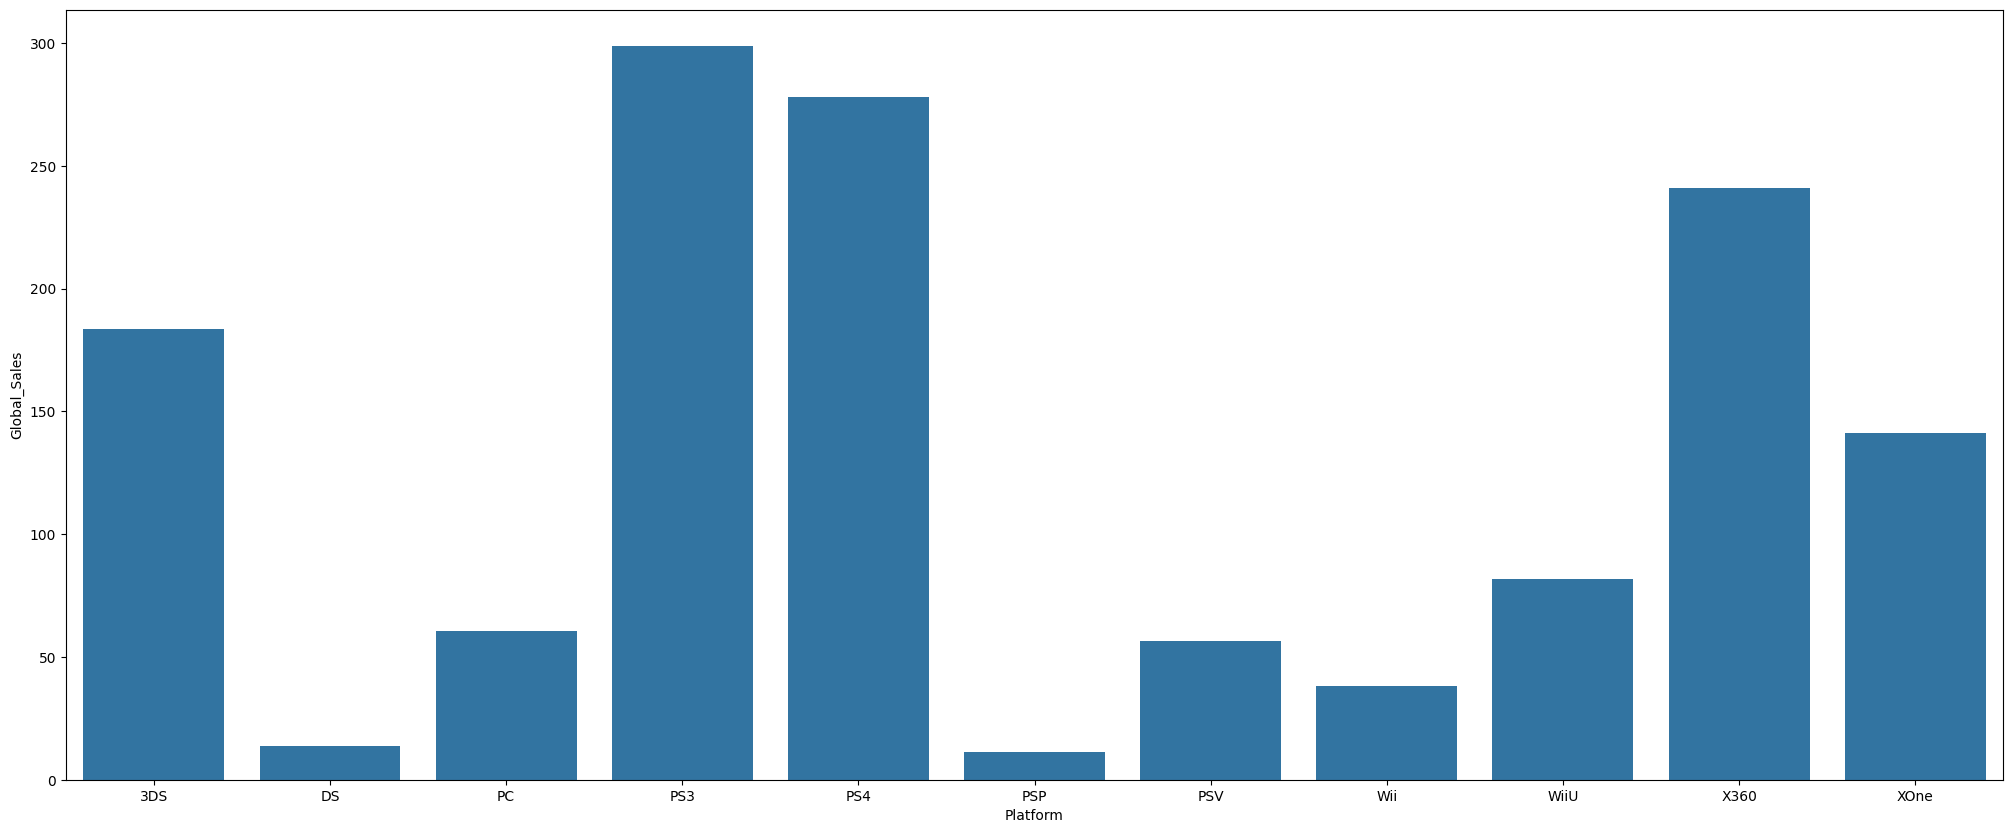

In [64]:
# Plotando as vendas por plataforma
fig, axs = plt.subplots(figsize = (25,10))
sns.barplot(data = rec, x = rec['Platform'], y = rec['Global_Sales'])

### 17 - A média de vendas nos continentes são iguais nesse período de dados?